# Lecture 19 2018-10-23: Pandas

Pandas i/o and more

In [1]:
import pandas as pd
from pandas import Series, DataFrame   # use these so often, this can be helpful

import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

## More on df.loc and df.iloc

DataFrames are designed by default to work on columns. 
This is because scientific data are often arranged with rows as observations and columns as variables being measured.
It is typical to analyze how the variables relate to each other, and to characterize how they change with the samples. 

But it is often useful to select specific observations. 
For example, one might want to analyze observations from different locations separately, or to separate observations with unusual values of specific variables (such as low GC content).

*numpy* provided a useful way to index and slice over different dimensions separately (by using a comma-separated list of indexes and slices). 
Pandas provides this functionality with the *loc* and *iloc* operators.

In [2]:
# create example dataset
# create dataset to work with

test_df=DataFrame( 
   [  ['w1','d1',1,10],
      ['w1','d3',2,20],
      ['w2','d1',3,30],
      ['w2','d2',4,40],
      ['w2','d2',5,60],
      ], 
    columns=['week','day','v1','v2'],
    index=['zero', 'one', 'two', 'three', 'four']
   )


type(test_df)
#test_df


pandas.core.frame.DataFrame

### loc selects rows by index name

Look closely at the shape of the objects these examples return

In [3]:
x = test_df.loc['two']
#test_df.loc['week', 'v2']
type(x)
x.shape

x

week    w2
day     d1
v1       3
v2      30
Name: two, dtype: object

In [4]:
x=test_df.loc[['three','two','four']]
x

,week,day,v1,v2
three,w2,d2,4,40
two,w2,d1,3,30
four,w2,d2,5,60


one can select both rows and columns with numpy syntax: lists separated by commas

In [5]:
x = test_df.loc['two', 'day'] # row, clounmn
#test_df.loc['week', 'v2']  # error
type(x)

x

'd1'

In [6]:
x=test_df.loc[['two','four'], ['day']]
x

,day
two,d1
four,d2


In [7]:
x=test_df.loc[['two','four'], 'day']
x

two     d1
four    d2
Name: day, dtype: object

In [8]:
x=test_df.loc[['zero','three'], ['v1', 'v2']]
x

,v1,v2
zero,1,10
three,4,40


### iloc selects rows by index

In [9]:
x = test_df.iloc[2]
#test_df.loc['week', 'v2']
type(x)
x.shape

x

week    w2
day     d1
v1       3
v2      30
Name: two, dtype: object

In [10]:
test_df.head()

,week,day,v1,v2
zero,w1,d1,1,10
one,w1,d3,2,20
two,w2,d1,3,30
three,w2,d2,4,40
four,w2,d2,5,60


In [11]:

x=test_df.iloc[[2,4]] # chose row, from 0
x

,week,day,v1,v2
two,w2,d1,3,30
four,w2,d2,5,60


In [12]:
x=test_df.iloc[[4,2], 1] # note change in order!
x

four    d2
two     d1
Name: day, dtype: object

In [13]:
x=test_df.iloc[[1,2], [2, 3, 0]]
x

,v1,v2,week
one,2,20,w1
two,3,30,w2


With iloc, you have full access to numpy-style slicing. note that you don't need a list of lists, just a list of slice indicators.

In [14]:
x=test_df.iloc[-2:,1:2]
x

,day
three,d2
four,d2


In [15]:
x='??' # x is not a slice in the sense of numpy, not an alias of a parent object

In [16]:
test_df  # change x didn't change the original dataframe

,week,day,v1,v2
zero,w1,d1,1,10
one,w1,d3,2,20
two,w2,d1,3,30
three,w2,d2,4,40
four,w2,d2,5,60


In [17]:
x=test_df  # but if x itself is an alias of a parent object, you can get side effects
x.iloc[0,:] = 'unknown'
#x['v2'] = np.inf
x
test_df

,week,day,v1,v2
zero,unknown,unknown,unknown,unknown
one,w1,d3,2,20
two,w2,d1,3,30
three,w2,d2,4,40
four,w2,d2,5,60


### More on creating pd.DataFrames

Note that one can create a pd.DataFrame in many ways. 
We used a list of lists above. 
But dicts are also common.

Here the keys are the index selectors. If it is a dict of dicts, the inner keys are columns. 

The following are equivalent.

In [18]:
test_df=DataFrame( 
   [  ['w1','d1',1,10],
      ['w1','d3',2,20],
      ['w2','d1',3,30],
      ['w2','d2',4,40],
      ['w2','d2',5,60],
      ], 
    columns=['week','day','v1','v2'],
    index=['zero', 'one', 'two', 'three', 'four']
   )


test_df

,week,day,v1,v2
zero,w1,d1,1,10
one,w1,d3,2,20
two,w2,d1,3,30
three,w2,d2,4,40
four,w2,d2,5,60


In [19]:
test_df=DataFrame( 
   {  'week': ['w1','w1', 'w2', 'w2', 'w2'],
      'day' : ['d1','d3', 'd1', 'd2', 'd2'],
      'v1' : [1, 2, 3, 4, 5],
      'v2' : [10, 20, 20, 40, 60],
   }, 
    index=['zero', 'one', 'two', 'three', 'four']
   )


test_df

,week,day,v1,v2
zero,w1,d1,1,10
one,w1,d3,2,20
two,w2,d1,3,20
three,w2,d2,4,40
four,w2,d2,5,60


In [20]:
test_df=DataFrame( 
   {'week': 
        {  
            'zero'  : 'w1',
            'one'   : 'w1',
            'two'   : 'w2',
            'three' : 'w2', 
            'four'  : 'w2'
        },
    'day':
         {
            'zero'  : 'd1',
            'one'   : 'd3',
            'two'   : 'd1',
            'three' : 'd2', 
            'four'  : 'd2'
         }, 
     'v1': 
        { 
            'zero'  : 1,
            'one'   : 2,
            'two'   : 3,
            'three' : 4, 
            'four'  : 5
         },
      'v2':
        {
           'zero'   : 10,
            'one'   : 20,
            'two'   : 30,
            'three' : 40, 
            'four'  : 50
        }
   }
)

test_df

,week,day,v1,v2
four,w2,d2,5,50
one,w1,d3,2,20
three,w2,d2,4,40
two,w2,d1,3,30
zero,w1,d1,1,10


## Reading and writing files to/from pandas

Pandas includes methods to make I/O easy.

In [21]:
pd.read_table?

the *read_table()* method in Pandas is a general method for reading files of many formats. There are methods that use *read_table()* internally that are specifically tailored for reading comma/tab delimited files, excel files, and html files: *read_csv()*, *read_excel()*, and *read_html()*.

To read comma separated files:

	pd.read_csv( *filename* )

I don't like comma-separated files, because some files include text that has commas in it. For example "sample from US, Ethiopia, or Europe" has two. This can confuse code that can't distinguish between field separating commas and "text" commas. This sort of parsing error can be **very** difficult to figure out. So, I recommend using tab delimited files when you can to avoid this confusion.


To read tab delimited files, either will work:

	pd.read_csv('sequence_summary.txt', sep='\t')
	pd.read_table('sequence_summary.txt')

Other useful parameters to pass to these methods:

parameter   | Meaning
:---------- | :-------------------
header=None | if the file has no headers
header=int  | if row "int" is column headers. Default (if left off) is header=0
comment='char' | treats any line beginning with 'char' like a comment. I like comment='#'
usecols=[list] | 'list' is a list of ints or strings, this reads just columns numbered in 'list' or those with the specified headers (in order)
index_col=int | which column is the Index

#### Examples

In [22]:
# a reminder of what the file looks like (!) executes bash commands
!head milk_summary.txt

'head' is not recognized as an internal or external command,
operable program or batch file.


In [23]:
x=pd.read_table('milk_summary.txt', 
                comment='#', 
                index_col=1, header= 1)
x.columns
x.head()

,MISEQ,PE716,TTGACCCT,TAGACCTA,ST6_21_F,0.28776978417266186,PE,ST6
16998-1719,,,,,,,,
9172-1724,MISEQ,PE714,TTGACCCT,CTAGAACA,ST6_12_F,0.384342,PE,ST6
17068-1733,MISEQ,ETU011,GTCGTGAT,CTAAGCCT,ST6_16_F,0.395683,ETU,ST6
20217-1738,MISEQ,ETR208,ACCACTGT,TGCTCTGA,ST6_10_F,0.315412,ETR,ST6
9687-1743,MISEQ,PE731,CCACTCCT,TAGGAGTA,ST6_25_F,0.380783,PE,ST6
12088-1744,MISEQ,GBR320,TCCTGGGT,TAGATCGC,FUT3_3_F,0.590747,GBR,FUT3


In [24]:
!head milk_summary.txt

'head' is not recognized as an internal or external command,
operable program or batch file.


In [25]:
x=pd.read_csv('milk_summary.txt', 
              comment='#', 
              sep='\t', 
              header=0,
              index_col=2
             )
#print(x.columns)
x.head()

,runtype,spot_id,forward_primer,reverse_primer,read_id,gc_content,country,gene_id
sample_id,,,,,,,,
PE716,MISEQ,16998-1719,TTGACCCT,TAGACCTA,ST6_21_F,0.287770,PE,ST6
PE714,MISEQ,9172-1724,TTGACCCT,CTAGAACA,ST6_12_F,0.384342,PE,ST6
ETU011,MISEQ,17068-1733,GTCGTGAT,CTAAGCCT,ST6_16_F,0.395683,ETU,ST6
ETR208,MISEQ,20217-1738,ACCACTGT,TGCTCTGA,ST6_10_F,0.315412,ETR,ST6
PE731,MISEQ,9687-1743,CCACTCCT,TAGGAGTA,ST6_25_F,0.380783,PE,ST6


In [26]:
# To only read certain columns, use *usecols*
x = pd.read_table('milk_summary.txt', 
                  comment='#', 
                  usecols=['sample_id', 'gc_content', 'country', 'gene_id'] 
                 )

x.head(n=5)
x.tail(n=5)

,sample_id,gc_content,country,gene_id
1995,GBR301,0.336918,GBR,ST6
1996,GBR308,0.444444,GBR,ST6
1997,PE709,0.669039,PE,FUT3
1998,ETU038,0.402827,ETU,ST6
1999,PE724,0.442446,PE,ST6


In [27]:
# To only read certain columns, use *usecols*
x = pd.read_table('milk_summary.txt', 
                  comment='#', 
                  usecols=[2,6,7,8],
                  index_col=2
                 )

x.head(n=5)
x.tail(n=5)

,sample_id,gc_content,gene_id
country,,,
GBR,GBR301,0.336918,ST6
GBR,GBR308,0.444444,ST6
PE,PE709,0.669039,FUT3
ETU,ETU038,0.402827,ST6
PE,PE724,0.442446,ST6


In [28]:
x.loc['GBR'].describe().loc['mean']

gc_content    0.457919
Name: mean, dtype: float64

In [29]:
mean_gbr = x.loc['GBR'].describe()

In [30]:
x.loc['GBR']

,sample_id,gc_content,gene_id
country,,,
GBR,GBR320,0.590747,FUT3
GBR,GBR329,0.466192,GULOP
GBR,GBR336,0.320285,ST6
GBR,GBR308,0.322581,ST6
GBR,GBR311,0.462633,ST6
GBR,GBR310,0.537367,GULOP
GBR,GBR335,0.326165,ST6
GBR,GBR338,0.667857,SEC
GBR,GBR325,0.327338,ST6


In [31]:
x.describe( include='all' )

,sample_id,gc_content,gene_id
count,2000,2000.000000,2000
unique,341,NaN,5
top,GBR320,NaN,ST6
freq,20,NaN,1242
mean,NaN,0.454477,NaN
std,NaN,0.103666,NaN
min,NaN,0.269784,NaN
25%,NaN,0.380783,NaN
50%,NaN,0.446043,NaN
75%,NaN,0.533808,NaN


## DataFrame manipulation

In [32]:
# create dataset to work with

test_df=DataFrame( 
   [  ['w1','d1',1,10],
      ['w1','d3',2,20],
      ['w2','d1',3,30],
      ['w2','d2',4,40],
      ['w2','d2',5,60],
      ], 
    columns=['week','day','v1','v2'],
    index=['zero', 'one', 'two', 'three', 'four']
   )

test_df

,week,day,v1,v2
zero,w1,d1,1,10
one,w1,d3,2,20
two,w2,d1,3,30
three,w2,d2,4,40
four,w2,d2,5,60


In [33]:
v_columns=test_df[['v1','v2']]
save_v_columns = v_columns # for later
v_columns

,v1,v2
zero,1,10
one,2,20
two,3,30
three,4,40
four,5,60


### built-in arithmetic operations, just as in numpy

In [34]:
### column/row sums: create new columns, work on individual columns
v_columns.sum()
v_columns['v2_col_sums'] = v_columns['v2'].sum()
v_columns['cumulative_v2_sums'] = v_columns['v2'].cumsum()
v_columns['v2_col_products'] = v_columns['v2'].prod()
v_columns['v1+v2'] = v_columns[['v1', 'v2']].sum(axis=1) # "axis" makes sense here, not a Series
v_columns

C:\Users\Mengmeng\Anaconda3\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,v1,v2,v2_col_sums,cumulative_v2_sums,v2_col_products,v1+v2
zero,1,10,160,10,14400000,11
one,2,20,160,30,14400000,22
two,3,30,160,60,14400000,33
three,4,40,160,100,14400000,44
four,5,60,160,160,14400000,65


In [35]:
v_columns.mean()
v_columns.std(axis=1)
v_columns.mean(axis=1)
v_columns.describe()

,v1,v2,v2_col_sums,cumulative_v2_sums,v2_col_products,v1+v2
count,5.000000,5.000000,5.0,5.000000,5.0,5.000000
mean,3.000000,32.000000,160.0,72.000000,14400000.0,35.000000
std,1.581139,19.235384,0.0,59.749477,0.0,20.796634
min,1.000000,10.000000,160.0,10.000000,14400000.0,11.000000
25%,2.000000,20.000000,160.0,30.000000,14400000.0,22.000000
50%,3.000000,30.000000,160.0,60.000000,14400000.0,33.000000
75%,4.000000,40.000000,160.0,100.000000,14400000.0,44.000000
max,5.000000,60.000000,160.0,160.000000,14400000.0,65.000000


In [36]:
# can be useful for transforming data (more later), and can use numpy operations
np.log(v_columns)
np.log2(v_columns)
np.sqrt(v_columns)

,v1,v2,v2_col_sums,cumulative_v2_sums,v2_col_products,v1+v2
zero,1.000000,3.162278,12.649111,3.162278,3794.733192,3.316625
one,1.414214,4.472136,12.649111,5.477226,3794.733192,4.690416
two,1.732051,5.477226,12.649111,7.745967,3794.733192,5.744563
three,2.000000,6.324555,12.649111,10.000000,3794.733192,6.633250
four,2.236068,7.745967,12.649111,12.649111,3794.733192,8.062258


To compute over *all* values, use *DataFrame.get_values()*. This converts a DataFrame into an *ndarray*. from there you can do anything you can do with an ndarray.

In [37]:
vals = v_columns.get_values()
print(vals)
vals.sum()
#vals.cumsum()
#vals.mean()
#vals.std()

[[       1       10      160       10 14400000       11]
 [       2       20      160       30 14400000       22]
 [       3       30      160       60 14400000       33]
 [       4       40      160      100 14400000       44]
 [       5       60      160      160 14400000       65]]


72001510

### Scalar operations

work on entire DataFrame, just like with numpy

In [38]:
#refresh dataset
v_columns = save_v_columns # restore original values
v_columns

,v1,v2,v2_col_sums,cumulative_v2_sums,v2_col_products,v1+v2
zero,1,10,160,10,14400000,11
one,2,20,160,30,14400000,22
two,3,30,160,60,14400000,33
three,4,40,160,100,14400000,44
four,5,60,160,160,14400000,65


In [39]:
print(v_columns)
v_columns - 2
v_columns * 10
v_columns ** 2
v_columns * v_columns
v_columns / 3
v_columns*np.pi

       v1  v2  v2_col_sums  cumulative_v2_sums  v2_col_products  v1+v2
zero    1  10          160                  10         14400000     11
one     2  20          160                  30         14400000     22
two     3  30          160                  60         14400000     33
three   4  40          160                 100         14400000     44
four    5  60          160                 160         14400000     65


,v1,v2,v2_col_sums,cumulative_v2_sums,v2_col_products,v1+v2
zero,3.141593,31.415927,502.654825,31.415927,4.523893e+07,34.557519
one,6.283185,62.831853,502.654825,94.247780,4.523893e+07,69.115038
two,9.424778,94.247780,502.654825,188.495559,4.523893e+07,103.672558
three,12.566371,125.663706,502.654825,314.159265,4.523893e+07,138.230077
four,15.707963,188.495559,502.654825,502.654825,4.523893e+07,204.203522


### binary operations (between DataFrames)

(maybe skip this?)

## statistics on DataFrame 

In [40]:
# compute means
print(rand_normal)
rand_normal.describe(include='all')
rand_normal.mean()                # columnwise
rand_normal.mean(axis=1)          # rowwise
rand_normal.get_values().mean()   # mean of all numbers

NameError: name 'rand_normal' is not defined

In [41]:
# compute std
print(rand_normal)
rand_normal.std()                # columnwise
rand_normal.std(axis=1)          # rowwise

NameError: name 'rand_normal' is not defined

       norm  norm_skewed       exp  exp_skewed
0  0.086500    10.173001  1.021276    6.021276
1 -1.558371     6.883258  0.272371    5.272371
2  0.835809    11.671619  0.429684    5.429684
3  2.181391    14.362781  0.809649    5.809649
4 -0.286795     9.426410  0.053809    5.053809


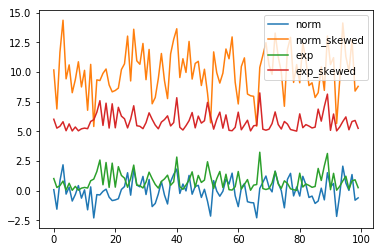

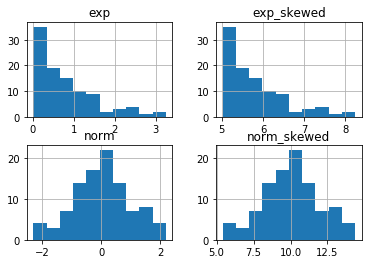

In [42]:
normal_dist = np.random.normal(0,size=100)
exp_dist = np.random.exponential(1/1.3,size=100)
rand_df = DataFrame( {'norm': normal_dist,
                      'norm_skewed': (normal_dist+5)*2,
                      'exp' : exp_dist, 
                      'exp_skewed' : (exp_dist+5)
                     }
                   )

print(rand_df.head())
h = rand_df.plot()
h = rand_df.hist() #column=['normal', 'normal_skewed', 'exponential', 'exp_skewed'], layout=(2,2))

backup = rand_df
transformed_df = rand_df

In [43]:
transformed_df.describe()


,norm,norm_skewed,exp,exp_skewed
count,100.000000,100.000000,100.000000,100.000000
mean,0.013776,10.027552,0.817486,5.817486
std,0.969754,1.939507,0.743426,0.743426
min,-2.294084,5.411832,0.019953,5.019953
25%,-0.579440,8.841120,0.271066,5.271066
50%,0.013933,10.027865,0.570994,5.570994
75%,0.613531,11.227061,1.098374,6.098374
max,2.181391,14.362781,3.240848,8.240848


,norm_skewed,exp_skewed,new_column_1,new_column_2
count,100.000000,100.000000,100.000000,100.000000
mean,5.612069,1.402003,0.701499,53.987567
std,1.939507,0.743426,0.653907,14.204071
min,0.996349,0.604470,0.000000,24.139621
25%,4.425638,0.855583,0.220876,44.801077
50%,5.612382,1.155511,0.484688,52.908427
75%,6.811579,1.682891,0.948565,59.886886
max,9.947298,3.825365,2.833056,102.481109


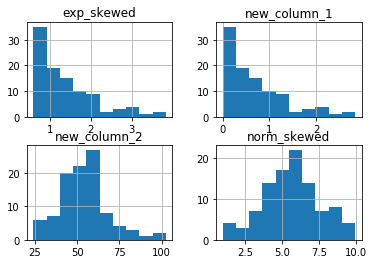

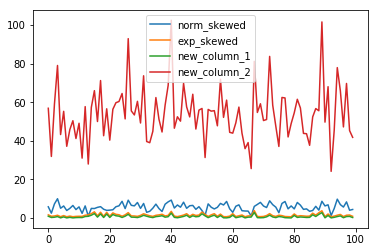

In [44]:
transformed_df = backup
transformed_df.drop(columns=['exp', 'norm'], inplace=True)

transformed_df['new_column_1'] = (transformed_df['exp_skewed'] * np.random.rand())
transformed_df['new_column_2'] = transformed_df['exp_skewed'] * transformed_df['norm_skewed']
transformed_df = transformed_df - transformed_df.get_values().min()  # note use of min()

h = transformed_df.hist()
h = transformed_df.plot()
transformed_df.describe()

In [45]:
transformed_df.corr()

,norm_skewed,exp_skewed,new_column_1,new_column_2
norm_skewed,1.000000,0.047575,0.047575,0.832317
exp_skewed,0.047575,1.000000,1.000000,0.583376
new_column_1,0.047575,1.000000,1.000000,0.583376
new_column_2,0.832317,0.583376,0.583376,1.000000


In [46]:
transformed_df.cov()

,norm_skewed,exp_skewed,new_column_1,new_column_2
norm_skewed,3.761689,0.068598,0.060338,22.929424
exp_skewed,0.068598,0.552682,0.486132,6.160257
new_column_1,0.060338,0.486132,0.427595,5.418479
new_column_2,22.929424,6.160257,5.418479,201.755647


In [47]:
transformed_df[['exp_skewed', 'new_column_1', 'new_column_2']].cov()

,exp_skewed,new_column_1,new_column_2
exp_skewed,0.552682,0.486132,6.160257
new_column_1,0.486132,0.427595,5.418479
new_column_2,6.160257,5.418479,201.755647
